In [18]:
import os, shutil

In [19]:
original_dataset_dir = r'C:\Users\suvar\Desktop\DL\CatDog\train'

In [21]:
original_dataset_dir = r'C:\Users\suvar\Desktop\DL\CatDog\train'
base_dir = r'C:\Users\suvar\Desktop\DL\CatDog\cats_and_dogs_small'
os.mkdir(base_dir)

In [22]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [23]:
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [24]:
fnames = ['cat.{}.jpg'.format(i) for i in range(2,1002)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)

In [25]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1002,1502)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [26]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1502,2002)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)

In [27]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)


In [28]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [29]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [30]:
print('Total training cat images: ', len(os.listdir(train_cats_dir)))
print('Total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('Total test cat images:', len(os.listdir(test_cats_dir)))
print('Total training dog images: ', len(os.listdir(train_dogs_dir)))
print('Total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('Total test dog images: ', len(os.listdir(test_dogs_dir)))

Total training cat images:  1000
Total validation cat images:  500
Total test cat images: 500
Total training dog images:  1000
Total validation dog images:  500
Total test dog images:  500


# Build Network

In [31]:
import tensorflow as tf

In [32]:
from keras import layers

In [33]:
from keras import models
import numpy

In [34]:
from PIL import Image
im = Image.open(r'C:\Users\suvar\Desktop\DL\CatDog\cats_and_dogs_small\test\cats\cat.1544.jpg')
w,h,c=im.mode
w,h,c
numpy.array(im).shape

(500, 374, 3)

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation ='sigmoid'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [37]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
from keras.preprocessing.image import ImageDataGenerator

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150,150), batch_size=20, class_mode= 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size =20, class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
# it yields batches of 150 × 150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,))
for data_batch, labels_batch in train_generator:
    print('data_batch shape: ', data_batch.shape)
    print('labels_batch shape: ', labels_batch.shape)
    break

data_batch shape:  (20, 150, 150, 3)
labels_batch shape:  (20,)


In [47]:
# batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.
history =  model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,validation_data=validation_generator, validation_steps=50)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 47s 472ms/step - loss: 0.6893 - accuracy: 0.5435 - val_loss: 0.6705 - val_accuracy: 0.6310
Epoch 2/30
100/100 [==============================] - 51s 511ms/step - loss: 0.6509 - accuracy: 0.6255 - val_loss: 0.6446 - val_accuracy: 0.5920
Epoch 3/30
100/100 [==============================] - 49s 493ms/step - loss: 0.6065 - accuracy: 0.6680 - val_loss: 0.6129 - val_accuracy: 0.6730
Epoch 4/30
100/100 [==============================] - 49s 491ms/step - loss: 0.5683 - accuracy: 0.6955 - val_loss: 0.5994 - val_accuracy: 0.6760
Epoch 5/30
100/100 [==============================] - 49s 492ms/step - loss: 0.5422 - accuracy: 0.7275 - val_loss: 0.5836 - val_accuracy: 0.6780
Epoch 6/30
100/100 [==============================] - 51s 509ms/step - loss: 0.5076 - accuracy: 0.7500 - val_loss: 0.5637 - val_accuracy: 0.6980
Epoch 7/30
100/100 [==============================] - 

In [48]:
# saves the whole architecture, weights and the optimizer state
model.save('cats_and_dogs_small_1.h5')

In [ ]:
# In case, you would like to save the best model(with the least loss), then you need to create a ModelCheckPoint callback object and pass it to the fit() method via the callbacks argument
# import pandas as pd
# from keras.callbacks import EarlyStopping, ModelCheckpoint

# #Stop when val_loss is not decreasing
# earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')

# #Save the model after every epoch.
# checkpointer = ModelCheckpoint(filepath='Model_1_weights.h5', verbose=1, save_best_only=True)

# #history variable will save training progress after each epoch 
# history = model.fit(X_train, y_train, batch_size=20, epochs=40, validation_data=(X_valid, y_valid), shuffle=True, callbacks=[checkpointer, earlyStopping])
# #Save progress of each epoch in .csv file 
# hist_df = pd.DataFrame(history.history) 
# hist_csv_file = 'History_Model_1.csv'
# with open(hist_csv_file, mode='w') as f:
#     hist_df.to_csv(f)

In [51]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

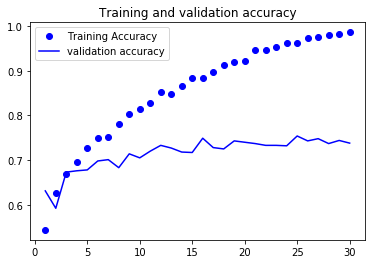

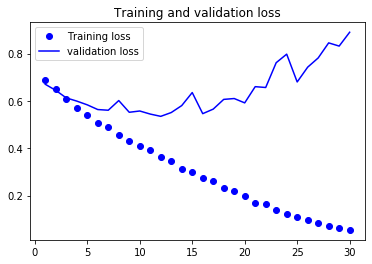

In [52]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Setting up a data augmentation configuration via ImageDataGenerator

In [61]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                            shear_range=0.2, zoom_range=0.2,horizontal_flip=True, fill_mode='nearest')

# Displaying randomly augmented training images

In [62]:
from keras.preprocessing import image

In [63]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
fnames[2]

'C:\\Users\\suvar\\Desktop\\DL\\CatDog\\cats_and_dogs_small\\train\\cats\\cat.1000.jpg'

In [64]:
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img) # Converts it to a Numpy array with shape (150, 150, 3)
x = x.reshape((1,) +x.shape) # Reshapes it to (1, 150, 150, 3)


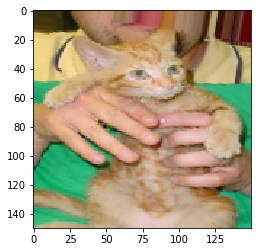

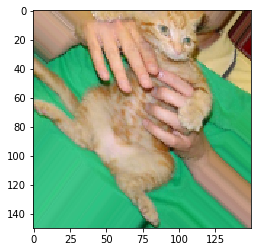

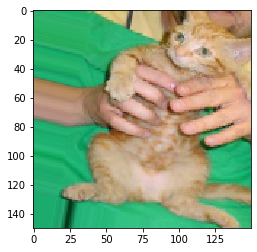

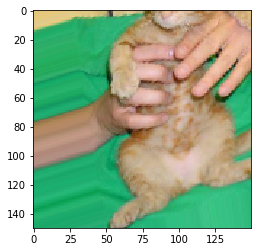

In [65]:
# Generates batches of randomly transformed images. Loops indefinitely, so you need to break the loop at some point!
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
plt.show()       
    

# Add dropout layer

In [66]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation ='sigmoid'))

In [67]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Training the convnet using data-augmentation generators

In [68]:
# train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
#                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=32, class_mode='binary')
# validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=32, class_mode='binary')

# history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)
# with this we will get 85% accuracy without/very little overfitting with data augmentation and dropout layer
# for further accuracy, we can fine tune network parameters(no.of filters per conv layer, no.of layers - 87& close)

# Using Pretrained model - VGG16

# Instantiating VGG16 convolutional base

In [69]:
from keras.applications import VGG16

In [71]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
conv_base.summary()

58892288/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [ ]:
# The final feature map has shape of (4,4,512). That’s the feature on top of which you’ll
# stick a densely connected classifier
# there are two ways you could proceed:
#  Running the convolutional base over your dataset, recording its output to a 
# Numpy array on disk, and then using this data as input to a standalone, densely
# connected classifier similar to those you saw in part 1 of this book. This solution
# is fast and cheap to run, because it only requires running the convolutional
# base once for every input image, and the convolutional base is by far the most
# expensive part of the pipeline. But for the same reason, this technique won’t
# allow you to use data augmentation.
# 2. Extending the model you have (conv_base) by adding Dense layers on top, and
# running the whole thing end to end on the input data. This will allow you to use
# data augmentation, because every input image goes through the convolutional
# base every time it’s seen by the model. But for the same reason, this technique is
# far more expensive than the first.

# 1. FAST FEATURE EXTRACTION WITHOUT DATA AUGMENTATION

In [72]:
import numpy as np

In [73]:
base_dir = r'C:\Users\suvar\Desktop\DL\CatDog\cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
datagen = ImageDataGenerator(rescale=1./255)
batch_size=20

In [ ]:
# Note that because generators yield data indefinitely in a loop,
# you must break after every image has been seen once

In [74]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150,150), batch_size=batch_size,class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size: (i+1) * batch_size] = features_batch
        labels[i*batch_size: (i+1) * batch_size] = labels_batch
        i += 1
        if i*batch_size >= sample_count:
            break
    return features, labels
    

In [75]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [76]:
# these features are of shape (samples, 4, 4, 512)
# Now flatten these features
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features =  np.reshape(test_features, (1000, 4*4*512))


# Defining and training the densely connected classifier

In [77]:
model = models.Sequential()
model.add(layers.Dense(256, activation ='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))
# Training with just dense layers is fast, an epoch takes 1 sec over CPU

Epoch 1/30
100/100 [==============================] - 2s 25ms/step - loss: 0.4721 - accuracy: 0.7560 - val_loss: 0.3180 - val_accuracy: 0.8630
Epoch 2/30
100/100 [==============================] - 2s 24ms/step - loss: 0.2872 - accuracy: 0.8775 - val_loss: 0.2620 - val_accuracy: 0.8990
Epoch 3/30
100/100 [==============================] - 2s 25ms/step - loss: 0.2436 - accuracy: 0.9005 - val_loss: 0.2414 - val_accuracy: 0.9020
Epoch 4/30
100/100 [==============================] - 2s 24ms/step - loss: 0.2113 - accuracy: 0.9115 - val_loss: 0.2439 - val_accuracy: 0.9020
Epoch 5/30
100/100 [==============================] - 3s 26ms/step - loss: 0.1723 - accuracy: 0.9325 - val_loss: 0.2764 - val_accuracy: 0.8830
Epoch 6/30
100/100 [==============================] - 3s 29ms/step - loss: 0.1534 - accuracy: 0.9395 - val_loss: 0.3024 - val_accuracy: 0.8780
Epoch 7/30
100/100 [==============================] - 3s 26ms/step - loss: 0.1374 - accuracy: 0.9455 - val_loss: 0.2433 - val_accuracy: 0.9040

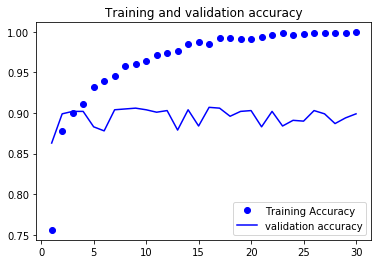

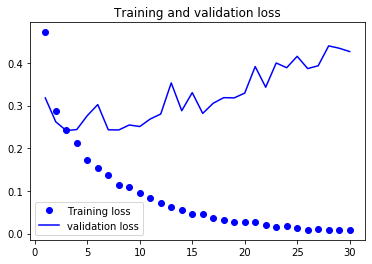

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [80]:
# There's still overfitting
# this technique doesn’t use data augmentation, which is essential for preventing overfitting with small image datasets.
# much slower and more expensive, but which allows you to use data augmentation
# during training: extending the conv_base model and running it end to end on
# the inputs.
# Don't run below technique on CPU. Use GPU

# 2. FEATURE EXTRACTION WITH DATA AUGMENTATION and VGG16

In [81]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [82]:
# The classifier we’re adding on top has 2 million parameters.
# Before you compile and train the model, it’s very important to freeze the convolutional
# base. Freezing a layer or set of layers means preventing their weights from being updated during training.
# set it's trainable attribute to False to Freeze a layer/model

In [83]:
print('This is the number of trainable weights before freezing conv_base: ', len(model.trainable_weights))

This is the number of trainable weights before freezing conv_base:  30


In [84]:
conv_base.trainable = False
print('This is the number of trainable weights after freezing conv_base: ', len(model.trainable_weights))

This is the number of trainable weights after freezing conv_base:  4


In [ ]:
# Don't run below - takes too much time if not GPU

In [ ]:
# train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
#                                    shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

# test_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
# validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

# model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])
# history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,
#                                 validation_steps=50)
# accuracy will be reached to 96%

# Fine Tuning

In [85]:
# it’s only possible to fine-tune the top layers of the convolutional base once the classifier on top has already been trained.
# page - 154
# unfreeze conv_base and freeze individual layers
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [86]:
# fine tune last 3 conv layers
conv_base.trainable=True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
# let's fine-tune with the RMSProp optimizer, using a very low learning rate. The reason for using a low learning rate is 
# that you want to limit the magnitude of the modifications you make to the representations of the three layers you’re  
# fine-tuning. below is the cont of above(2nd) method
# model.compile(loss='binary_crossentropy', optimizer= optimizers.RMSprop(lr=1e-5), metrics=['accuracy'])
# history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, 
#                               validation_steps=50)
# must check smooting of plots on page 157
# accuracy increased from 96 to 97

In [ ]:
# Evaluate the model on the test data
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=20, class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps = 50)

# will get test acc of 97%
